## Analysis of five big Hispanic YouTube Cooking Channels
### The data will be pulled from .csv files that were created with the YouTube API

### Import necessary packages

In [1]:
import pandas as pd
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set display options to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format

### Analysis on the overview data

In [3]:
channels_data = pd.read_csv('channel_overviews.csv')
channels_data

,channel_name,channel_description,channel_creation,view_count,subscriber_count,video_count,uploads,mean_views_per_video,year_created,view_subscriber_ratio
0,Jauja Cocina Mexicana,Jauja Cocina Mexicana™ es un canal de cocina ú...,2014-03-19 13:43:10+00:00,1446521856,8220000,764,UUVZsY1CF9VwLTKgs9YLQkXw,1893353.21,2014,0.57
1,VICKY RECETA FACIL,¡¡Nuevas recetas cada semana!! Estás en el mej...,2011-12-16 20:54:25+00:00,892974996,6100000,1108,UUewhO42h_TIKZdntpI-v39g,805934.11,2011,0.68
2,Temperos e Sabores,"Recetas caseras y muy sabrosas, vamos a cocina...",2012-10-28 17:02:48+00:00,531060907,4600000,1459,UUN3Grwgu5ZFNZzkl4IY3V1w,363989.66,2012,0.87
3,Anna recetasfaciles,Recetas de cocina fáciles.,2012-11-24 16:50:53+00:00,651948293,4660000,1101,UUVf-uzV0XR-3DLtRs1sg6Og,592141.96,2012,0.71
4,La Cocina de Loli Dominguez,"Dedicado a gastronomía, cocina y repostería, e...",2013-06-13 17:45:25+00:00,371275053,2580000,1021,UU5ONfXPjWgqElh0NZaRJ1tg,363638.64,2013,0.69


### Visualization Overview Data

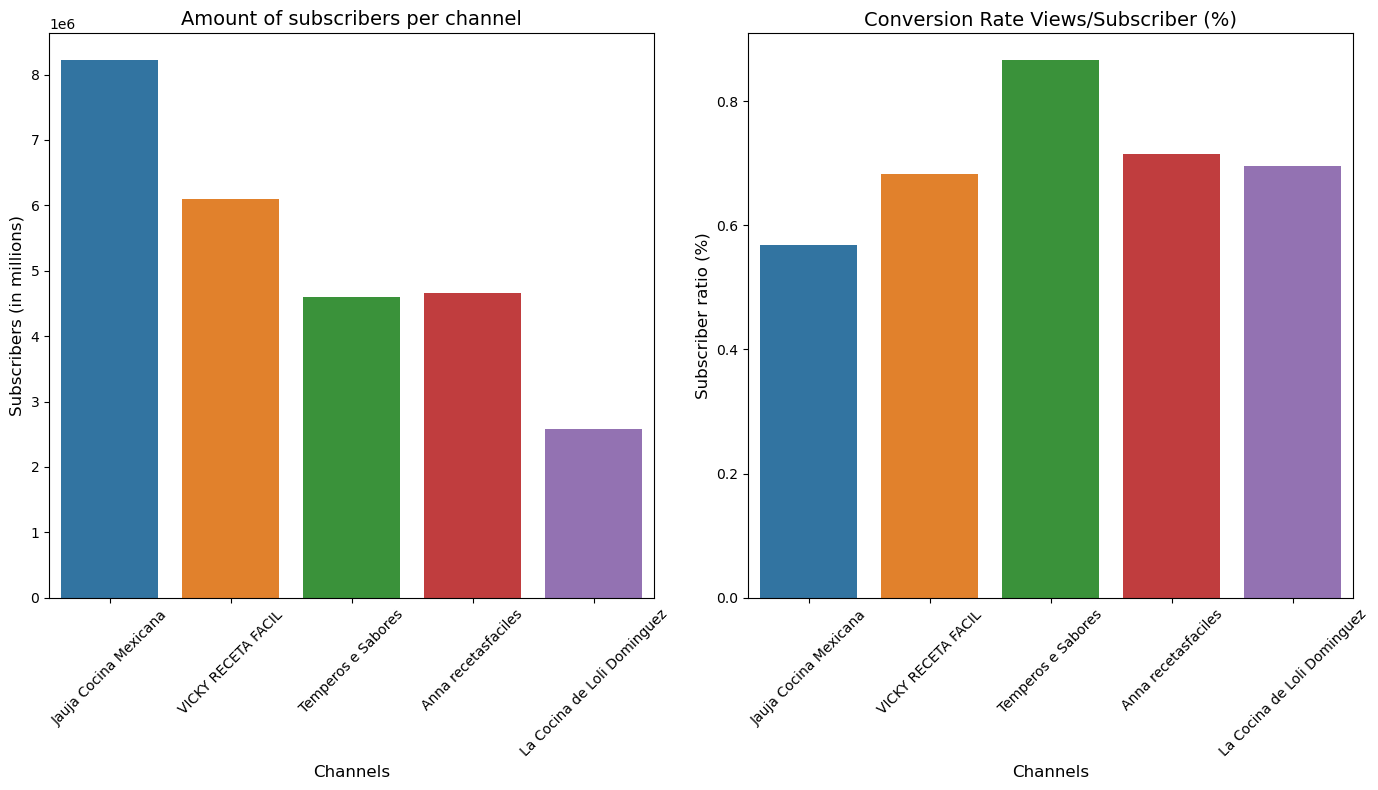

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Plot most_common_words_title
sns.barplot(x='channel_name', y='subscriber_count', data=channels_data, ax=axes[0])
axes[0].set_title('Amount of subscribers per channel', fontsize=14)
axes[0].set_ylabel('Subscribers (in millions)', fontsize=12)
axes[0].set_xlabel('Channels', fontsize=12)

# Plot most_common_tags
sns.barplot(x='channel_name', y='view_subscriber_ratio', data=channels_data, ax=axes[1])
axes[1].set_title('Conversion Rate Views/Subscriber (%)', fontsize=14)
axes[1].set_ylabel('Subscriber ratio (%)' , fontsize=12)
axes[1].set_xlabel('Channels', fontsize=12)

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

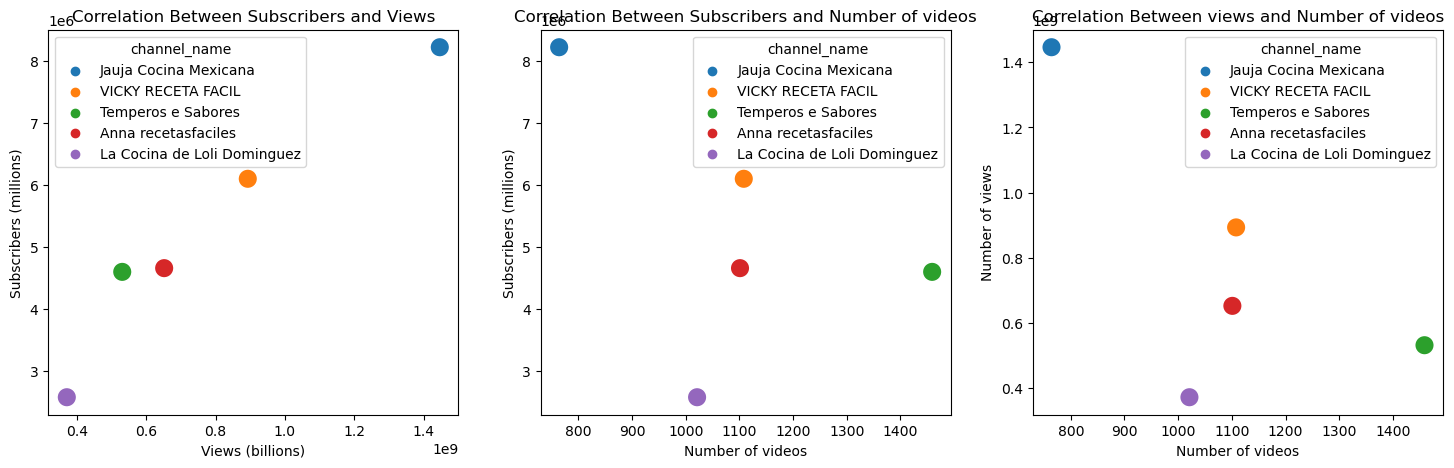

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='view_count', y='subscriber_count', hue='channel_name', data=channels_data, s=200, ax=axes[0])
axes[0].set_xlabel('Views (billions)')
axes[0].set_ylabel('Subscribers (millions)')
axes[0].set_title('Correlation Between Subscribers and Views')

sns.scatterplot(x='video_count', y='subscriber_count', hue='channel_name', data=channels_data, s=200, ax=axes[1])
axes[1].set_xlabel('Number of videos')
axes[1].set_ylabel('Subscribers (millions)')
axes[1].set_title('Correlation Between Subscribers and Number of videos')

sns.scatterplot(x='video_count', y='view_count', hue='channel_name', data=channels_data, s=200, ax=axes[2])
axes[2].set_xlabel('Number of videos')
axes[2].set_ylabel('Number of views')
axes[2].set_title('Correlation Between views and Number of videos')

plt.show()


### Takeaways from the overview data:
* In general, the more views a channel gets, it seems they will have the most amount of subscribers. 
* Jauja Cocina mexicana has the highest amount of views and subscribers, even if her channel has the lowest viewer/subscriber ratio and the least amount of videos.
* Even though La Cocina de Loli Dominguez has almost the same viewer/subscriber ratio than Vicky Receta Fácil, Vicky has the second highest subscriber count, thanks to the fact that she has more views. 
* Temperos e Sabores has the highest viewer/subscriber ratio, but again, since she has the second lowest views, she also has the second lowest subscriber count of the group.
* It would be interesting to get more data to go deeper into how to get views for the channel, since that seems to be one of the (if not THE) key to the success of the channel.

## Analysis on the videos data

In [6]:
videos_data = pd.read_csv('videos_data.csv')
videos_data.head()

,channel_name,video_id,published_at,title,description,tags,duration,view_count,like_count,comment_count,duration_sec,year
0,Jauja Cocina Mexicana,8yp_f0vP3JM,2023-09-12 15:27:02+00:00,¿Qué Hago de Comer el Día del Grito?,Qué Hago de Comer. Que hago de comer con Jauja...,"['que hago de comer', 'que hago de comer recet...",PT14M49S,392079,15845,568,889.00,2023
1,Jauja Cocina Mexicana,7hoK_K3KX9Q,2023-09-05 16:37:01+00:00,Mi Nueva Receta de Pozole Rojo. ¡Mejor que Nunca!,Pozole Rojo. Pozole Rojo de Jauja Cocina Mexic...,"['pozole rojo', 'pozole rojo receta', 'receta ...",PT9M39S,646269,29953,1000,579.00,2023
2,Jauja Cocina Mexicana,aBU8NmFii3g,2023-08-29 15:30:00+00:00,Entomatadas Rellenas Que No Tienen Comparación,Entomatadas. Entomatadas de Jauja Cocina Mexic...,"['entomatadas', 'entomatadas receta', 'receta ...",PT7M31S,163424,12383,570,451.00,2023
3,Jauja Cocina Mexicana,mtyfxC_wSI0,2023-08-22 15:28:03+00:00,Mi Ensalada de Atún Favorita del Camarógrafo,Ensalada de Atún. Ensalada de Atún de Jauja Co...,"['ensalada de atun', 'ensalada de atun receta'...",PT6M5S,283617,19575,1006,365.00,2023
4,Jauja Cocina Mexicana,wSdzd9xlxNk,2023-08-15 15:28:15+00:00,Miren Las Tortitas de Pollo que Cociné Con Sól...,Tortitas de Pollo. Tortitas de Pollo deshebrad...,"['tortitas de pollo', 'tortitas de pollo recet...",PT8M45S,254356,13133,554,525.00,2023


### Create a new DataFrame with mean data per year, per channel

In [7]:
videos_df = videos_data.copy()

# Getting the average amount of videos per year, per channel
video_means = videos_df.groupby(['channel_name', 'year']).size().reset_index(name='video_count')
video_means

,channel_name,year,video_count
0,Anna recetasfaciles,2014,5
1,Anna recetasfaciles,2015,159
2,Anna recetasfaciles,2016,47
3,Anna recetasfaciles,2017,54
4,Anna recetasfaciles,2018,69
5,Anna recetasfaciles,2019,77
6,Anna recetasfaciles,2020,71
7,Anna recetasfaciles,2021,133
8,Anna recetasfaciles,2022,197
9,Anna recetasfaciles,2023,289


In [8]:
#Getting different average counts 
means_to_get = ['view_count', 'like_count', 'comment_count', 'duration_sec']

for column in means_to_get:
    averages = videos_df.groupby(['channel_name', 'year'])[column].mean().reset_index()
    averages.rename(columns={column: f'mean_{column}'}, inplace= True)
    
    # Append the results to the result DataFrame
    video_means = video_means.merge(averages, on=['channel_name', 'year'], how = 'left')

video_means

,channel_name,year,video_count,mean_view_count,mean_like_count,mean_comment_count,mean_duration_sec
0,Anna recetasfaciles,2014,5,344752.40,3219.40,136.60,594.60
1,Anna recetasfaciles,2015,159,428969.78,6575.67,93.26,321.37
2,Anna recetasfaciles,2016,47,1655238.62,35882.66,718.38,430.11
3,Anna recetasfaciles,2017,54,1555742.78,41673.26,716.72,421.17
4,Anna recetasfaciles,2018,69,1859838.72,70650.38,1062.74,418.99
5,Anna recetasfaciles,2019,77,885588.75,32363.40,602.34,465.77
6,Anna recetasfaciles,2020,71,1126366.04,41695.52,841.62,1342.68
7,Anna recetasfaciles,2021,133,454595.41,17880.81,496.68,1396.58
8,Anna recetasfaciles,2022,197,225982.71,8368.05,133.24,950.98
9,Anna recetasfaciles,2023,289,135051.15,3584.25,60.82,436.32


In [9]:
#Save the new DataFrame to csv:
video_means.to_csv('video_means_per_year.csv', index=False)

### Extract the most common words used in the title and the tags (for all channels combined)

In [10]:
# Set NLTK to use stopwords for both Spanish and Portuguese (Temperos e Sabores has some content in this language)
spanish_stopwords = set(nltk.corpus.stopwords.words('spanish'))
portuguese_stopwords = set(nltk.corpus.stopwords.words('portuguese'))
custom_stopwords = spanish_stopwords.union(portuguese_stopwords)

# Custom list of characters to remove
custom_characters_to_remove = ['¿', '?', ',', '.', ':', ';', '-', '|', '#', '!', '¡', '(', ')']

# Function to preprocess text (tokenization, lowercase, character removal, and stopwords removal)
def preprocess_text(text):
    try:
        # Normalize text to remove accents and convert to lowercase
        text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
        
        # Tokenize the text
        tokens = word_tokenize(text.lower())
                        
        # Remove characters, stopwords, and non-alphanumeric words
        tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens if token not in custom_stopwords and token.isalnum()]
        
        # Remove custom characters
        tokens = [token for token in tokens if token not in custom_characters_to_remove]
        
        # Manual normalization rules
        tokens = [token.replace("recetas", "receta") for token in tokens]
        tokens = [token.replace("deliciosa", "delicioso") for token in tokens]
        tokens = [token.replace("comidas", "comida") for token in tokens]
        tokens = [token.replace("faciles", "facil") for token in tokens]
        tokens = [token.replace("hacer", "hace") for token in tokens]
        
        return tokens
    except:
        # Handle exceptions, e.g., for non-string data
        return []

column_name = 'title'
# Apply preprocessing to the specified column
videos_df[column_name] = videos_df[column_name].apply(lambda x: ' '.join(preprocess_text(str(x))))


In [11]:
# Combine all 'title' values into a single string
combined_text = ' '.join(videos_df[column_name])

# Split the combined text into words based on spaces
words = combined_text.split()

# Count word frequencies
word_counts = pd.Series(words).value_counts()

# Words to exclude
exclude_words = ["vicky", "vickyrecetafacil", "loli", "dominguez"]

# Filter out excluded words
filtered_word_counts = word_counts[~word_counts.index.isin(exclude_words)]

# Get the most common words
most_common_words_title = filtered_word_counts.head(20)  # Change 10 to the desired number of common words

# Print or analyze the most common words
print(f"Most common words in the '{column_name}' column (excluding specified words and normalized):")
print(most_common_words_title)

Most common words in the 'title' column (excluding specified words and normalized):
receta          2147
facil           1907
paso             983
delicioso        642
cocina           419
horno            404
pollo            394
tarta            326
tutorial         321
queso            297
hace             286
salsa            254
crema            246
chocolate        244
pan              218
bizcocho         176
ingredientes     176
pastel           164
carne            157
shorts           147
dtype: int64


In [12]:
column_name2 = 'tags'
# Apply preprocessing to the specified column
videos_df[column_name2] = videos_df[column_name2].apply(lambda x: ' '.join(preprocess_text(str(x))))

In [13]:
combined_text = ' '.join(videos_df[column_name2])

words = combined_text.split()

word_counts = pd.Series(words).value_counts()

exclude_words = ["vicky", "vickyrecetafacil", "loli", "dominguez"]

filtered_word_counts = word_counts[~word_counts.index.isin(exclude_words)]

most_common_words_tags = filtered_word_counts.head(20)  # Change 10 to the desired number of common words

# Print or analyze the most common words
print(f"Most common words in the '{column_name2}' column (excluding specified words and normalized):")
print(most_common_words_tags)

Most common words in the 'tags' column (excluding specified words and normalized):
facil        5451
receta       4939
hace         3744
cocina       1993
pollo        1439
comida       1107
horno        1026
casera        961
queso         777
food          725
salsa         622
carne         587
chocolate     586
navidad       519
crema         476
prepara       471
leche         466
limon         455
mexicana      453
paso          417
dtype: int64


In [14]:
#Convert the variables into DataFrames

most_common_words_title_df = most_common_words_title.reset_index()
most_common_words_title_df.columns = ['title_word', 'count']

# Save the DataFrame to a CSV file
most_common_words_title_df.to_csv('most_common_words_title.csv', index=False)

most_common_words_title_df

,title_word,count
0,receta,2147
1,facil,1907
2,paso,983
3,delicioso,642
4,cocina,419
5,horno,404
6,pollo,394
7,tarta,326
8,tutorial,321
9,queso,297


In [15]:
# Convert the Series to a DataFrame
most_common_tags_df = most_common_words_tags.reset_index()
most_common_tags_df.columns = ['tag', 'count']

# Save the DataFrame to a CSV file
most_common_tags_df.to_csv('most_common_tags.csv', index=False)

most_common_tags_df

,tag,count
0,facil,5451
1,receta,4939
2,hace,3744
3,cocina,1993
4,pollo,1439
5,comida,1107
6,horno,1026
7,casera,961
8,queso,777
9,food,725


## Visualization of videos data

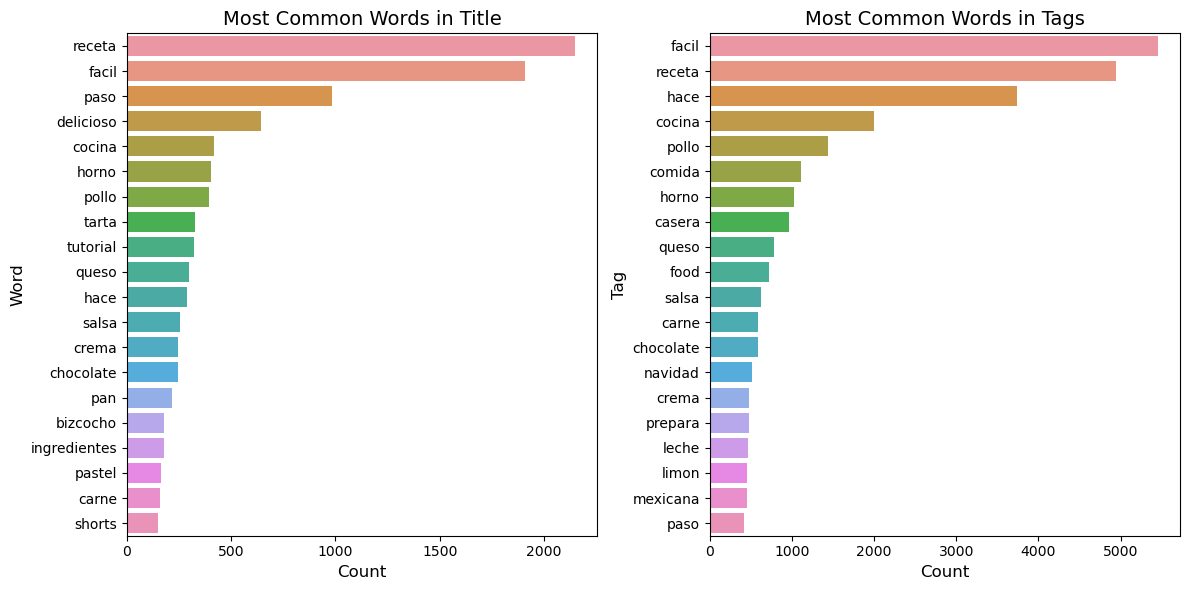

In [16]:
# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot most_common_words_title
sns.barplot(x='count', y='title_word', data=most_common_words_title_df, ax=axes[0])
axes[0].set_title('Most Common Words in Title', fontsize=14)
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_ylabel('Word', fontsize=12)

# Plot most_common_words_tags
sns.barplot(x='count', y='tag', data=most_common_tags_df, ax=axes[1])
axes[1].set_title('Most Common Words in Tags', fontsize=14)
axes[1].set_xlabel('Count', fontsize=12)
axes[1].set_ylabel('Tag', fontsize=12)

plt.tight_layout()

plt.show()

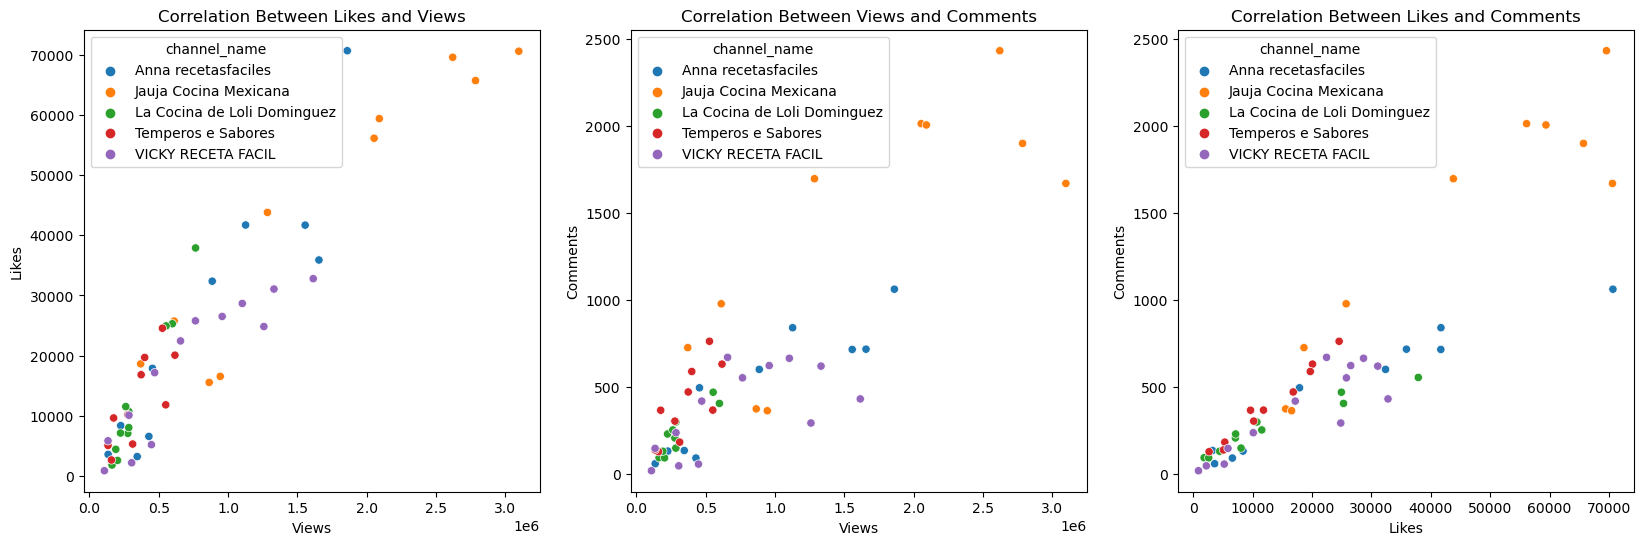

In [17]:
fig, axes = plt.subplots(1,3, figsize=(20, 6))

#Correlation views and likes
sns.scatterplot(x='mean_view_count', y='mean_like_count', hue='channel_name', data=video_means, ax=axes[0])
axes[0].set_xlabel('Views')
axes[0].set_ylabel('Likes')
axes[0].set_title('Correlation Between Likes and Views')

# Correlation Comments and views
sns.scatterplot(x='mean_view_count', y='mean_comment_count', hue='channel_name', data=video_means, ax=axes[1])
axes[1].set_xlabel('Views')
axes[1].set_ylabel('Comments')
axes[1].set_title('Correlation Between Views and Comments')

#Correlation likes and comments
sns.scatterplot(x='mean_like_count', y='mean_comment_count', hue='channel_name', data=video_means, ax=axes[2])
axes[2].set_xlabel('Likes')
axes[2].set_ylabel('Comments')
axes[2].set_title('Correlation Between Likes and Comments')

plt.show()


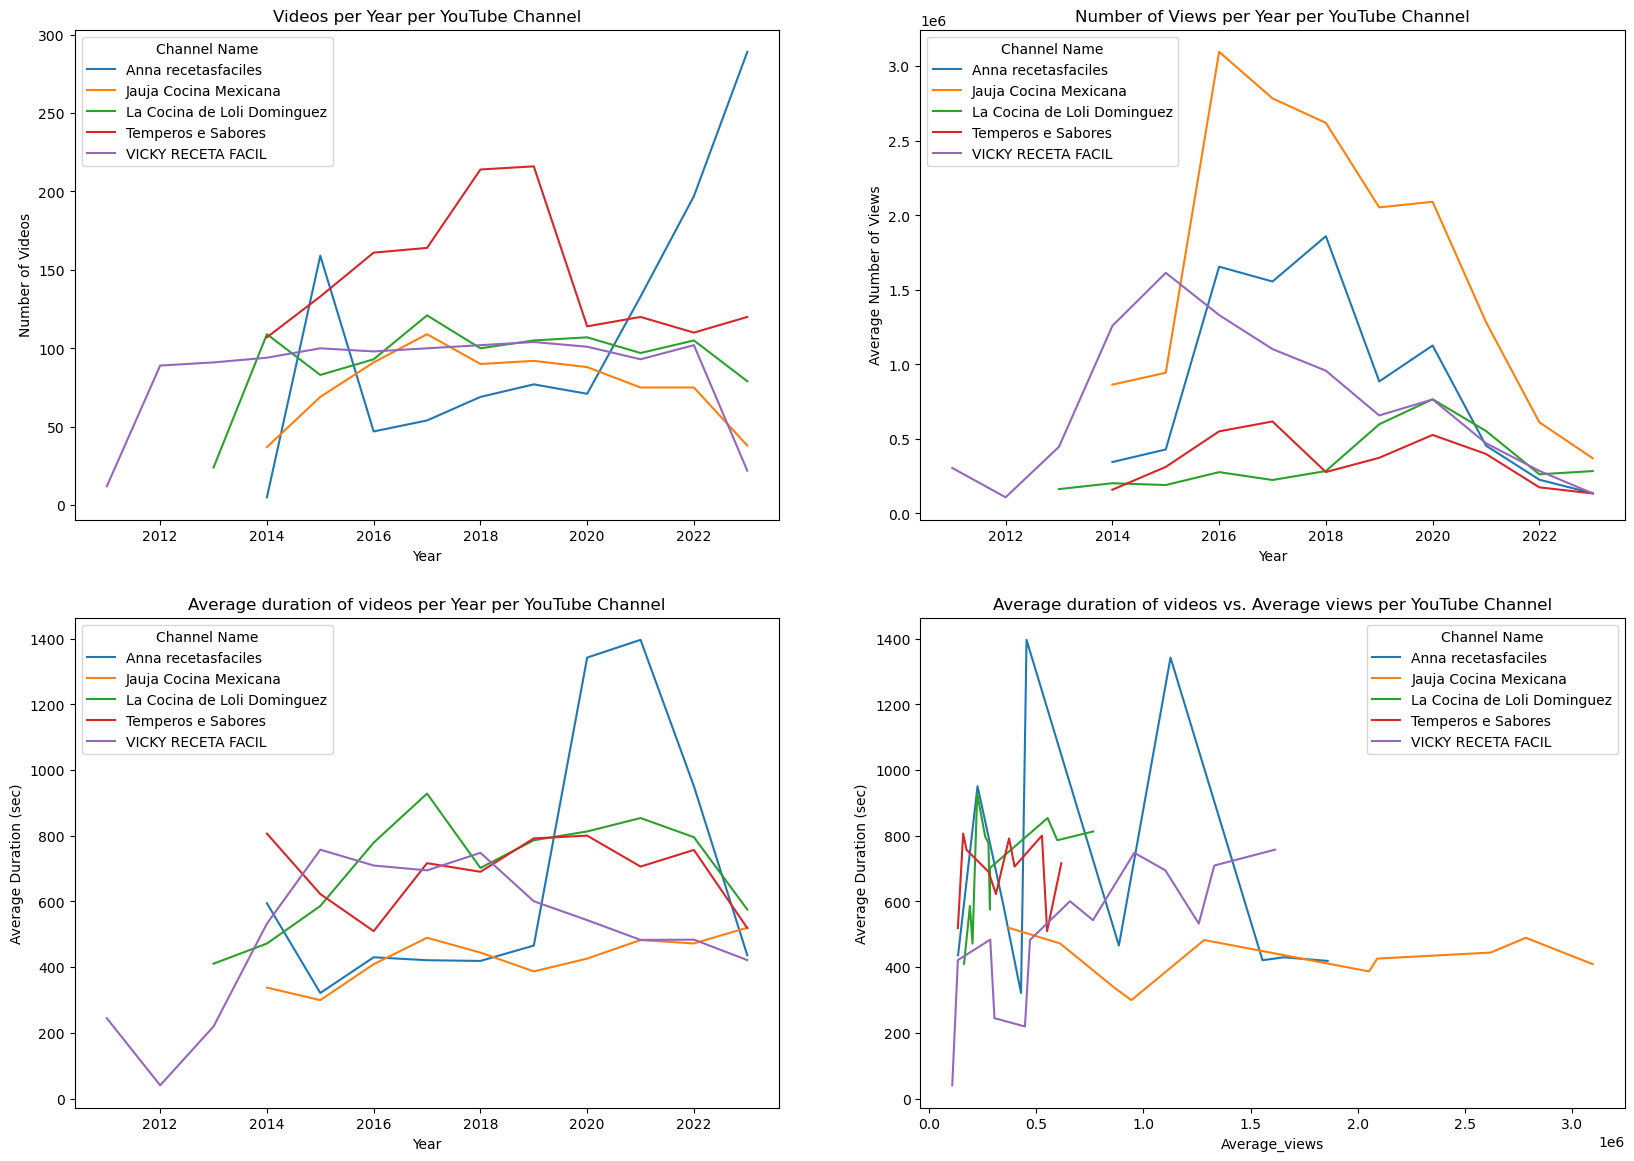

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(20, 14)) 

sns.lineplot(x='year', y='video_count', hue='channel_name', data=video_means, ax=axes[0, 0])
axes[0, 0].set_title('Videos per Year per YouTube Channel')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Videos')
axes[0, 0].legend(title='Channel Name', loc='upper left')

sns.lineplot(x='year', y='mean_view_count', hue='channel_name', data=video_means, ax=axes[0, 1])
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Number of Views')
axes[0, 1].set_title('Number of Views per Year per YouTube Channel')
axes[0, 1].legend(title='Channel Name', loc='upper left')

sns.lineplot(x='year', y='mean_duration_sec', hue='channel_name', data=video_means, ax=axes[1, 0])
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Average Duration (sec)')
axes[1, 0].set_title('Average duration of videos per Year per YouTube Channel')
axes[1, 0].legend(title='Channel Name', loc='upper left')

sns.lineplot(x='mean_view_count', y='mean_duration_sec', hue='channel_name', data=video_means, ax=axes[1, 1])
axes[1, 1].set_xlabel('Average_views')
axes[1, 1].set_ylabel('Average Duration (sec)')
axes[1, 1].set_title('Average duration of videos vs. Average views per YouTube Channel')
axes[1, 1].legend(title='Channel Name', loc='upper right')


# Show the plot
plt.show()

### Takeaways from the videos Data
* The two most common words all five channels use, both in titles and tags, are: "Fácil"(easy) and "Receta"(recipe). However, they use it much more often in the tags. Fácil(easy) is used in 99% of the video tags and Receta(recipe) is used around 90% of the time. In the title the words are used about 35-40% of the time.
* Besides those words, some other words repeat both in the title and tags. For example: Paso(step) from "paso a paso" or "step by step". That one is however much more frequently used in titles and it is number 20 in frequency in the tags.
* Horno (oven) is the 6th more common word in titles and the 7th more common word on tags.
* The words used give us an idea of what makes the channel interesting for viewers and what information are they looking for. 

* The duration of the videos does not seem to have an influence in the amount of views the video (or channel) gets. All five channels seem to be in a downward trend in views since 2021 approximately. in 2016 'Jauja Cocina Mexicana' published the videos that have given her  the most views in her channel. 'Vicky Receta Facil' published in 2015 the most succesful video or videos of her channel. All channels seemed to have an increase in views in around 2020, and this was most likely due to the pandemic and quarantine measures. 'Ana recetasfaciles' has succesful videos that she published in 2016, 2018 and 2020. She is also has an upward trend in the amount of videos she is releasing, this can be due to the use of YouTube Shorts, which are shorter videos that can be faster to produce. This may be confirmed by the graph of the duration of videos, where we see that 'Ana recetasfaciles' has been making shorter videos in average. 

* 'Jauja Cocina Mexicana' has little variation in the duration of her videos, and even though 'Temperos e Sabores' has a bit more peaks and valleys than 'Jauja', her videos tend to last more or less the same over the years. 'Vicky Receta Facil' had shorter videos in the early years of her channel. She made her longest videos around 2015 and 2018 and seems to have been making slightly shorter videos since. 



## Conclusions

* This analysis was based on an arbitrary choice of channels. They do have some things in common: all five channels create content mainly in spanish, are hosted by a woman who started the channel at home on her own and not with a team of producers or similar. They all create sweet and savory recipes and all have over 2.5 million subscribers. 

* Content is king. Meaning, the data on this very small sample of channels shows that regardless of the year a video (or channel) was created, the duration of their videos, the conversion rate from view to subscriber or the amount of videos released... the higher the views, the higher the likes, subscriber count and comments. This would translate, in theory, in higher income for the channel, but the data gatehered in this case did not contain information on income or demographics. 

* Making content that attract views is the key. There are many strategies that people follow, but that is out of the scope of this analysis. What we could see from the data, is that some clues may be in the words used to title, describe and tag the videos, so a deeper analysis into the description of the videos and maybe the tags and titles per channel would be interesting.

* Increasing the number and types of channels may present interesting comparative results. Meaning, including more channels that have producers behind it, or focus only on sweet recipes, or have other formats of presenting the videos. 

* This was, in any case, a nice and fun project to practice the understanding of APIs, cleaning, analysing and visualizing data with python.

* I also created some of the graphics on my [tableau public profile](https://public.tableau.com/app/profile/rebeca.natera/viz/YouTubeAnalyticsProject-fiveHispanicCookingChannels/YouTubeAnalyticsProject), because it helps to practice with that tool as well and also the visualizations are a more interactive.